# Clasificador paisajes

Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalúa el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendrás que recorre las carpetas/imágenes con `os.listdir()`, e ir cargando todas las imágenes como arrays de `numpy`

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. Pon softmax como ultima capa

In [1]:
import os

PATH = os.getcwd()

TEST_DATA_PATH = os.path.join(PATH, "..", "data", "seg_test")
TRAIN_DATA_PATH = os.path.join(PATH, "..", "data", "seg_train")

In [2]:
class_names = os.listdir(TEST_DATA_PATH)
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'glacier': 0,
 'buildings': 1,
 'street': 2,
 'sea': 3,
 'forest': 4,
 'mountain': 5}

In [3]:
import numpy as np
import cv2
from skimage.io import imread

def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except:
                print("Error en lectura imagen", image_path)

    return np.array(X), np.array(y)

In [4]:
#IMAGE_SIZE = (32, 32)
IMAGE_SIZE = (64,64)
#IMAGE_SIZE = (224,224)

X_train, y_train = read_data(TRAIN_DATA_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_DATA_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 64, 64, 3)
(3000, 64, 64, 3)
(14034,)
(3000,)


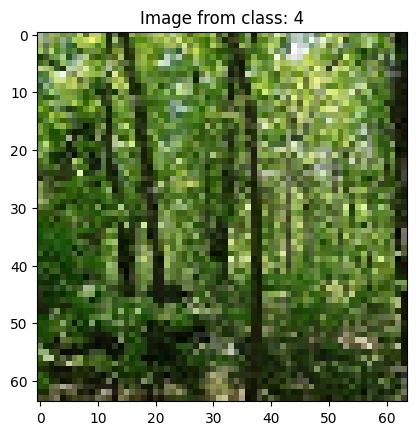

In [5]:
import numpy as np
import matplotlib.pyplot as plt

selection = np.random.choice(range(0, len(y_train)))

plt.imshow(X_train[selection]);
plt.title(f"Image from class: {y_train[selection]}");

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [7]:
X_train = X_train/255
X_test = X_test/255

Modelo

In [8]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Dense(16),
    keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2
)

2024-07-23 12:02:19.102531: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 12:02:19.174813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 12:02:19.202013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 12:02:19.210339: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 12:02:19.254007: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.4628 - loss: 1.4590 - val_accuracy: 0.6413 - val_loss: 0.9740
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6513 - loss: 0.9406 - val_accuracy: 0.6929 - val_loss: 0.8399
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6939 - loss: 0.8161 - val_accuracy: 0.6673 - val_loss: 0.9042
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7404 - loss: 0.7216 - val_accuracy: 0.6972 - val_loss: 0.8308
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7642 - loss: 0.6616 - val_accuracy: 0.7139 - val_loss: 0.8138
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7885 - loss: 0.6062 - val_accuracy: 0.7015 - val_loss: 0.7923
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8111 - loss: 0.5382 - val_accuracy: 0.7289 - val_loss: 0.7605
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8281 - loss: 0.4851 - val_accuracy: 0.7061 - v

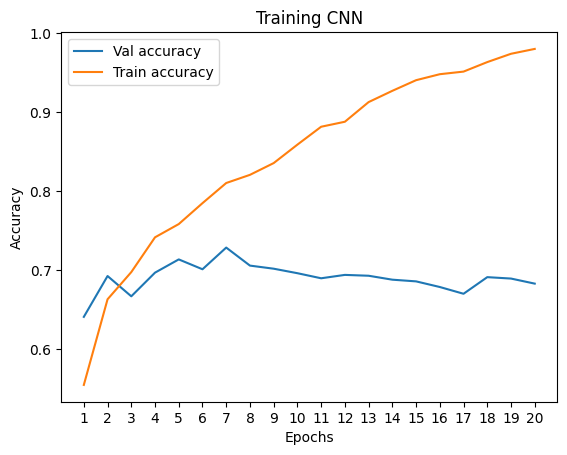

In [9]:
import pandas as pd

df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()

In [10]:
model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6870 - loss: 1.9317


[1.898039698600769, 0.6853333115577698]

In [11]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.27, 0.72, 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.01, 0.07, 0.01, 0.86],
       ...,
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.  , 0.  , 0.94]], dtype=float32)

In [12]:
pred_labels = np.argmax(y_pred, axis=1)
pred_names = [class_names[pred] for pred in pred_labels]

<Axes: >

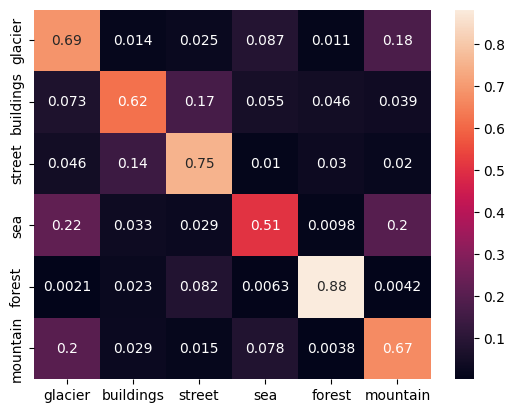

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [14]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

base_model = ResNet50V2(include_top= True, input_shape=(224, 224, 3), weights='imagenet', classifier_activation= 'softmax')

In [15]:
IMAGE_SIZE = (224,224)

X_train, y_train = read_data(TRAIN_DATA_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_DATA_PATH, IMAGE_SIZE)

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

X_train = X_train/255
X_test = X_test/255

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 224, 224, 3)
(3000, 224, 224, 3)
(14034,)
(3000,)


In [16]:
preds = base_model.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
pred_names = [class_names[pred] for pred in pred_labels]

94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 518ms/step


<Axes: >

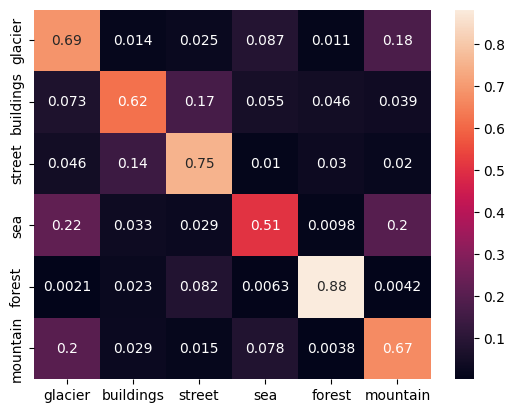

In [17]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)